# **K-Means Clustering Using Mall Customers Dataset**

---



#### **Introduction**

This notebook explores different clustering techniques using the Mall Customers Dataset to identify distinct customer segments.

**Dataset:** The analysis utilizes the Mall Customers Dataset, containing information about customers including their CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100).

**Data Preprocessing:**
- The `Gender` column was one-hot encoded to convert it into a numerical format suitable for clustering algorithms.
- The `CustomerID` column was dropped as it is not relevant for clustering.

**Clustering Techniques Used and Process:**
- **K-Means Clustering:**
    - The elbow method was employed by calculating the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (1 to 10). The elbow plot suggested an optimal `k` of 5.
    - The silhouette score was also calculated for different numbers of clusters (2 to 10) to evaluate the quality of the clustering. While the silhouette score suggested `k=7`, the difference from `k=5` was not significant, reinforcing the choice of `k=5` based on the elbow method and visual inspection.
    - The K-Means model was built with 5 clusters, and the cluster centers were examined.
    - A scatter plot of 'Annual_Income_(k$)' versus 'Spending_Score' was generated, colored by the assigned clusters, to visualize the resulting segments.

- **Hierarchical Clustering:**
    - The Euclidean distance between data points was calculated.
    - A dendrogram was generated using the Ward linkage method to visualize the hierarchical clustering process and help determine the number of clusters.
    - An Agglomerative Clustering model was fitted with 4 clusters (chosen based on visual inspection of the dendrogram and comparison with K-Means results).
    - A scatter plot of 'Annual_Income_(k$)' versus 'Spending_Score' was generated, colored by the assigned hierarchical clusters.

- **Density-Based Spatial Clustering of Applications with Noise (DBSCAN):**
    - The Nearest Neighbors algorithm was used to calculate the distances to the nearest neighbor for each data point.
    - A k-distance plot was generated to help determine the optimal `epsilon` parameter, identifying a point where the distance plot shows a significant bend (around 13-15).
    - The `min_samples` parameter was chosen as twice the number of dimensions (2 * 4 = 8).
    - The DBSCAN model was fitted with `epsilon=15` and `min_samples=8`.
    - A scatter plot of 'Annual_Income_(k$)' versus 'Spending_Score' was generated, colored by the assigned DBSCAN clusters, including noise points.

**Challenges Faced:**
- Determining the optimal number of clusters can be subjective and requires considering multiple evaluation metrics (Elbow method, Silhouette score) and visual inspection, as seen with the slight discrepancy between the elbow method and silhouette score for K-Means.
- Visualizing clusters in datasets with more than two features is challenging when relying solely on 2D scatter plots. Principal Component Analysis (PCA) or other dimensionality reduction techniques could be used for better visualization in higher dimensions.

**Learnings and Conclusion:**
- This notebook demonstrates the application of three different clustering algorithms (K-Means, Hierarchical, and DBSCAN) for customer segmentation.
- Each algorithm has its strengths and weaknesses and can produce different clustering results.
- The choice of parameters (e.g., `k` for K-Means, linkage and number of clusters for Hierarchical, `epsilon` and `min_samples` for DBSCAN) is crucial and impacts the clustering outcome.
- Visualizations are essential for understanding the characteristics of the clusters, although their interpretability decreases with increasing data dimensionality.
- Based on the analysis, the mall customers can be effectively segmented into distinct groups based on their income and spending habits. This segmentation can provide valuable insights for developing targeted marketing strategies, personalized promotions, and optimizing store layouts to cater to the specific needs and preferences of each customer segment.

#### **Loading libraries and Dataste**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
malldf = pd.read_csv("Mall_Customers.csv")
malldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
malldf = pd.get_dummies(malldf, columns=['Gender'])
malldf.head(3)

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False


In [4]:
malldf = malldf.drop('CustomerID', axis=1)

In [5]:
from sklearn.cluster import KMeans

In [6]:
import warnings
warnings.filterwarnings("ignore")

#### **Elbow Plot Method to find optimal K**

In [9]:
# Calculate WCSS for K=1 to 11
wcss = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(malldf)
    wcss.append(kmeans.inertia_)

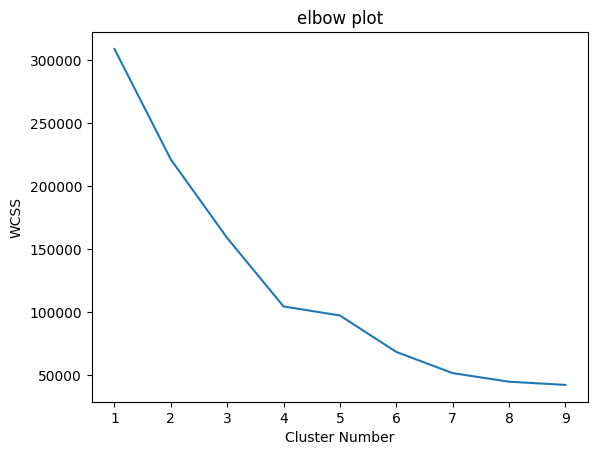

In [10]:
# Elbow Plot
plt.plot(range(1,10),wcss)
plt.title("elbow plot")
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")
plt.show()

**Optimal K is 5**

#### **Silhoutte Score to check clustering quality**

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
# Calculate silhouette scores for k = 1 to 10
silhouette=[]
k_range=range(2,10)
for i in k_range:
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(malldf)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(malldf, labels))

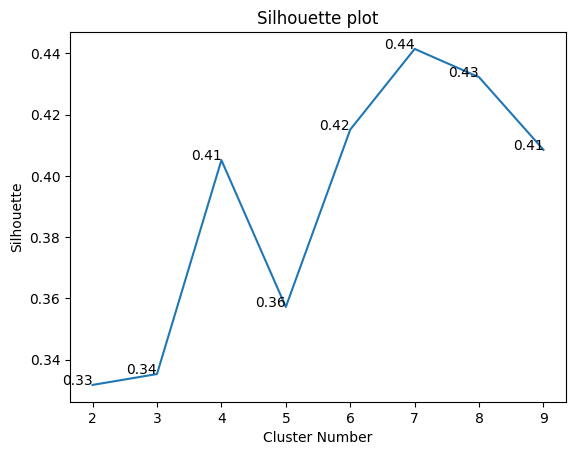

In [ ]:
plt.plot(range(2,10),silhouette)
plt.title("Silhouette plot")
plt.xlabel("Cluster Number")
plt.ylabel("Silhouette")
for i, silhouette in enumerate(silhouette):
    plt.text(k_range[i], silhouette, round(silhouette, 2), ha='right')
plt.show()

**Elbow plot gives optimal k as 5, Silhoutte method gives 7 but silhoutte score not so different from 5 so we take 5 as optimal K**

#### **Building Clusters with optimal value 5**

In [15]:
kmeansmodel=KMeans(n_clusters=5).fit(malldf)

In [16]:
kmeansmodel.cluster_centers_

array([[43.93421053, 55.21052632, 49.44736842,  0.59210526,  0.40789474],
       [45.2173913 , 26.30434783, 20.91304348,  0.60869565,  0.39130435],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [40.32432432, 87.43243243, 18.18918919,  0.48648649,  0.51351351],
       [24.96      , 28.04      , 77.        ,  0.56      ,  0.44      ]])

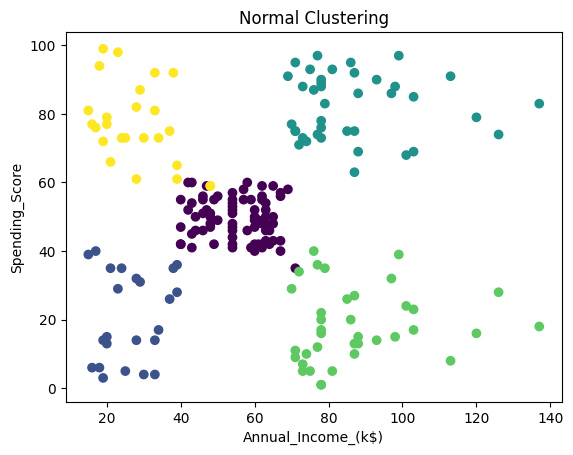

In [24]:
plt.scatter(x='Annual_Income_(k$)',y='Spending_Score',data=malldf,c=kmeansmodel.labels_)
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Normal Clustering")
plt.show()

#### **Hierarchical Clustering**

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
malldf_euclidean=euclidean_distances(malldf)
print(malldf_euclidean[:10, :10]) # Printing first 10 rows and columns of malldf_euclidean

[[ 0.         42.04759208 33.06055051 38.249183   12.28820573 37.20215048
  36.82390528 55.24490927 57.76677246 35.04283094]
 [42.04759208  0.         75.02666193  4.79583152 42.27292278  5.65685425
  76.36753237 13.56465997 89.1571646  13.41640786]
 [33.06055051 75.02666193  0.         71.06335202 35.74912586 70.03570518
  15.13274595 88.07383266 44.22668877 66.82065549]
 [38.249183    4.79583152 71.06335202  0.         37.86819246  1.73205081
  72.03471385 17.11724277 84.66404195  9.11043358]
 [12.28820573 42.27292278 35.74912586 37.86819246  0.         37.10795063
  34.24908758 54.59853478 49.63869458 32.07802986]
 [37.20215048  5.65685425 70.03570518  1.73205081 37.10795063  0.
  71.20393248 18.05547009 84.25556361  9.16515139]
 [36.82390528 76.36753237 15.13274595 72.03471385 34.24908758 71.20393248
   0.         88.81441324 29.20616373 66.19667665]
 [55.24490927 13.56465997 88.07383266 17.11724277 54.59853478 18.05547009
  88.81441324  0.         99.82484661 23.10844002]
 [57.766

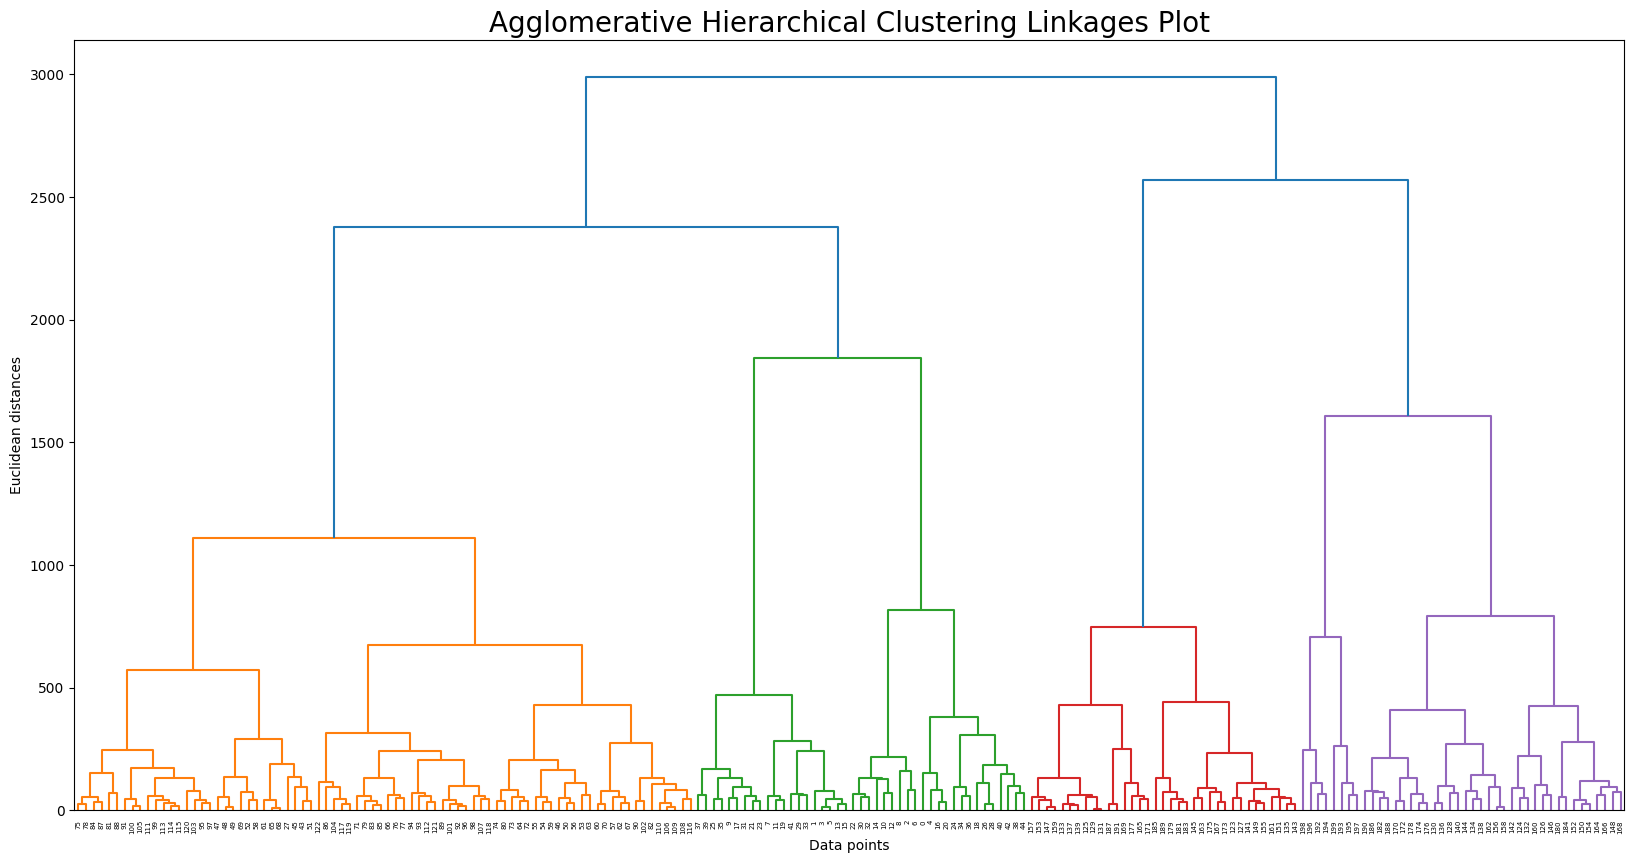

In [20]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(malldf_euclidean,method="ward"))
plt.title("Agglomerative Hierarchical Clustering Linkages Plot", fontsize=20)
plt.xlabel("Data points")
plt.ylabel("Euclidean distances")
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hclust=AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="ward").fit(malldf)

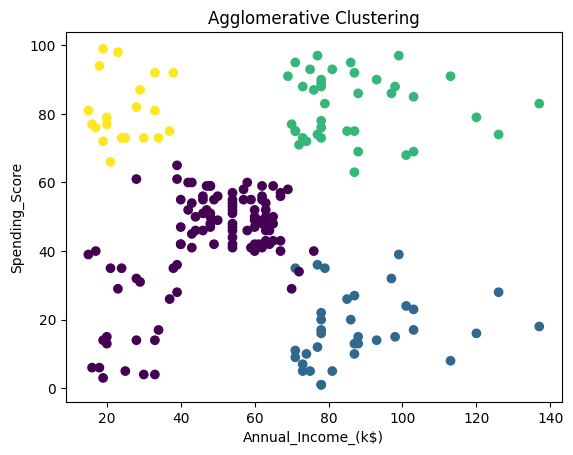

In [23]:
plt.scatter(x='Annual_Income_(k$)',y='Spending_Score',data=malldf,c=hclust.labels_)
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Agglomerative Clustering")
plt.show()

#### **Density Based Clustering**

In [25]:
from sklearn.neighbors import NearestNeighbors

neighbors=NearestNeighbors() # by default n_neighbors=5
nbrs=neighbors.fit(malldf)

In [26]:
distances,indices=nbrs.kneighbors(malldf)

In [27]:
distances=np.sort(distances[:,1])
# column 1 of distances stores the distance to the nearest neghbour for each point
# This code sorts the points in ascending order of dist. to nearest neighbour

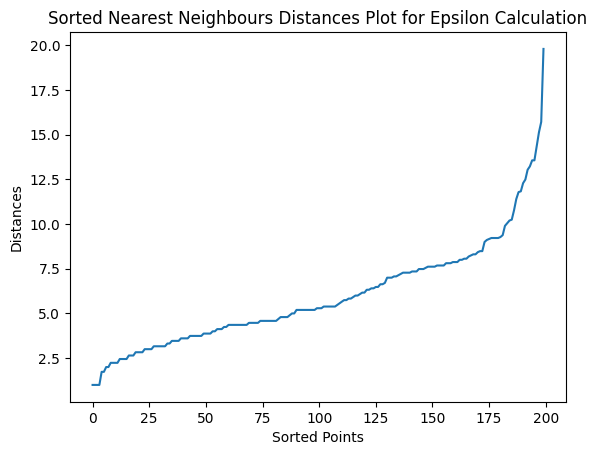

In [29]:
plt.plot(distances)
plt.title("Sorted Nearest Neighbours Distances Plot for Epsilon Calculation")
plt.xlabel("Sorted Points")
plt.ylabel("Distances")
plt.show()
# y-axis point at which line becomes straight is the
# Epsilon=13
# MinPoints = 2*4=8 i.e, 2*No.of Dimenstions (Gender, Age, Annual Income, Spending Score)

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
dbs=DBSCAN(eps=15,min_samples=8).fit(malldf)

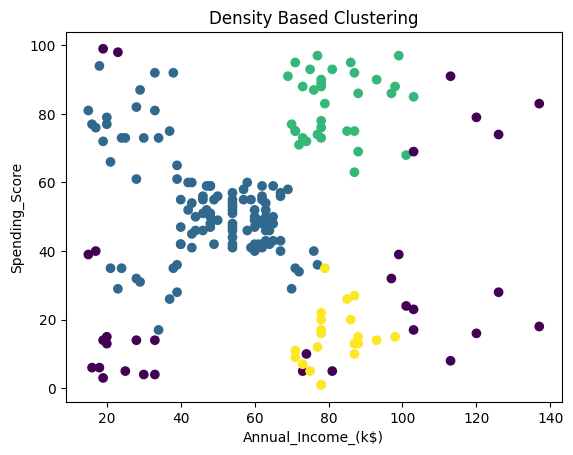

In [32]:
plt.scatter(x='Annual_Income_(k$)',y='Spending_Score',data=malldf,c=dbs.labels_)
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.title("Density Based Clustering")
plt.show()